## Introduction

In this article, we mainly use Decision Tree nad Random Forest to solve classification problem of heart disease and compare them to Logistic and KNN that we used before.
Therefore, we use the same data as Classification.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
df=pd.read_csv("C:\Documents\Data Analysis\Assignments3\heart-disease-uci/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
y=df.target.values
x_data=df.drop(['target'],axis=1)

#Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

#Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Decision Tree

In [166]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print('Train Accuracy:',format(clf.score(x_train, y_train)))
print('Test Accuracy:',format(clf.score(x_test, y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.8032786885245902


It is apparently that secision tree model overfits the training data. Thus, we control the depth of tree and see how it will improve.

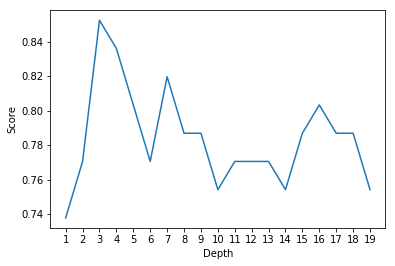

The best depth: 3
Corresponding accuracy on test set: 0.8524590163934426


In [23]:
scoreList = []
for i in range(1,20):
    clf2 = DecisionTreeClassifier(max_depth=i)  
    clf2.fit(x_train, y_train)
    scoreList.append(clf2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("Depth")
plt.ylabel("Score")
plt.show()

print('The best depth:',scoreList.index(max(scoreList))+1)
print('Corresponding accuracy on test set:',max(scoreList))

After controlling the depth, decision tree performs much better than before.

As we known, one of the most important advantages of decision tree is that it gives us a direct and easily comprehensible tree-like result. How does it look like in this situation?

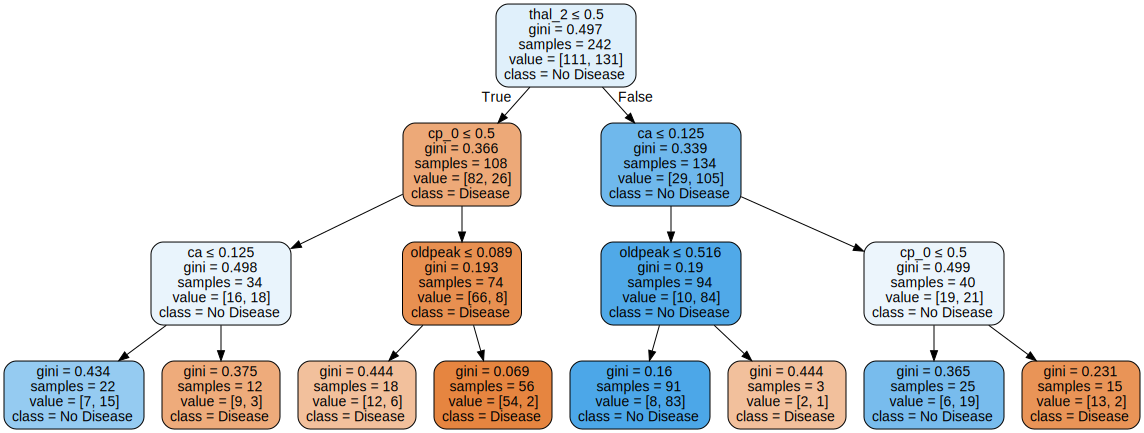

In [69]:
import graphviz
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
clf3=DecisionTreeClassifier(max_depth=3)
clf_out=clf3.fit(x_train,y_train)

dot_data=tree.export_graphviz(clf_out, out_file=None,
                              class_names =['Disease','No Disease'],
                              feature_names = x.columns,
                             filled=True, rounded=True,
                             special_characters=True)
graph=graphviz.Source(dot_data) 
graph

Clarification: 
* `thal_2` represents fixed defect in heart
* `cp_0` represents having typical angina
* `ca` represents the number of major vessels (0-3) colored by flourosopy
* `oldpeak` represents ST depression induced by exercise relative to rest, which is a sign of heart diseases

All above are the key features to diagnose whether a person has heart disease and it looks that they totally make sense. However, it is hard to believe that only 4 features are able to tell a person has heart disease or not. We need to use an advanced method, Random Forest, to further test it.

## Random Forest

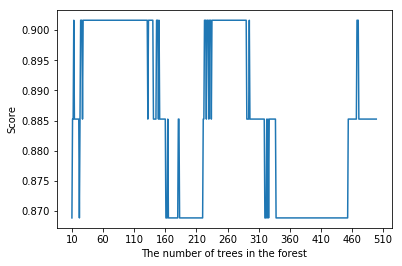

In [53]:
scoreList2 = []
for i in range(10,500):
    rf2=RandomForestClassifier(n_estimators=i, max_depth=3,random_state=0)
    rf2.fit(x_train, y_train)
    scoreList2.append(rf2.score(x_test, y_test))
    
plt.plot(range(10,500), scoreList2)
plt.xticks(np.arange(10,550,50))
plt.xlabel("The number of trees in the forest")
plt.ylabel("Score")
plt.show()

In [167]:
rf=RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0)
rf.fit(x_train, y_train)
print('Train Accuracy:',format(rf.score(x_train, y_train)))
print('Test Accuracy:',format(rf.score(x_test, y_test)))

Train Accuracy: 0.8636363636363636
Test Accuracy: 0.9016393442622951


It seems that Random Forest works better than decision tree by giving higher accuracy level.

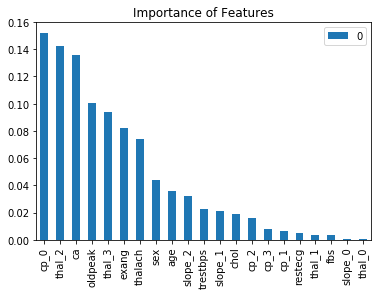

In [49]:
importances = list(zip(rf.feature_importances_, x.columns))
importances.sort(reverse=True)
pd.DataFrame(importances, index=[i for (_,i) in importances]).plot(kind = 'bar')
plt.title('Importance of Features')
plt.show()

The important features are consistent with what we found in Decision Tree. Then, we intend to check the confusion matrix and see what kind of mistake we make.

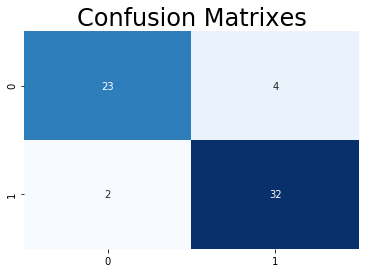

In [71]:
from sklearn.metrics import confusion_matrix


y_head_rf = rf.predict(x_test)

cm_rf = confusion_matrix(y_test,y_head_rf)

#plt.figure(figsize=(15,6))
plt.title("Confusion Matrixes",fontsize=24)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In terms of statistics, the model performs pretty well since only a few people are mispredicted. But concerning of practical issue, **False Positive** is more serious than **False Negative** in diagnosing. Those two who have heart disease but being diagonsed not could miss the treatment and die on heart disease. Thus, we want **False Positive** to be 0 on this model by adjusting class weight.

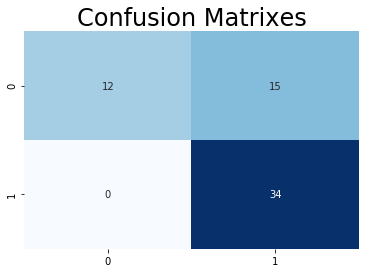

Train Accuracy: 0.78099173553719
Test Accuracy: 0.7540983606557377


In [180]:
rf2=RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0,class_weight={0:1,1:25})
rf2.fit(x_train,y_train)
y_head_rf2 = rf2.predict(x_test)
cm_rf2 = confusion_matrix(y_test,y_head_rf2)
plt.title("Confusion Matrixes",fontsize=24)
sns.heatmap(cm_rf2,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

print('Train Accuracy:',format(rf2.score(x_train, y_train)))
print('Test Accuracy:',format(rf2.score(x_test, y_test)))

Although **False Positive** is diminished to 0, **False Positive** seems to be too high. However, this trade-off is inevitable. If we want to reduce **False Negative** without changing **False Positive**, more features needs to be added or we can use another model to further test those who have been misdiagnosed.

## AdaBoost

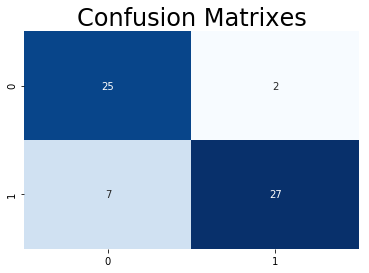

In [156]:
from sklearn.ensemble import AdaBoostClassifier
base=RandomForestClassifier(n_estimators=100,max_depth=5, random_state=0,class_weight={0:1,1:250000})
ada=AdaBoostClassifier(n_estimators=20000,algorithm="SAMME.R")
ada.fit(x_train,y_train)
y_head_ada = ada.predict(x_test)
cm_ada = confusion_matrix(y_test,y_head_ada)
plt.title("Confusion Matrixes",fontsize=24)
sns.heatmap(cm_ada,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()